In [1]:
# import pandas as pd
# data = pd.read_csv('/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data.csv')
# data.head()


# ENSEMBLE

In [2]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

# Create the connection
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

# create the dataframe from a query
ensembl_species = pd.read_sql_query("SELECT * FROM speciesdb where dbname = 'ENSEMBLE'", cnx)
print ('Total number of fungi species in ensembl database: ',ensembl_species.size)
ensembl_species.head()

Total number of fungi species in ensembl database:  17842


,TAXID,GENUSNAME,SPECIESNAME,STRAIN,DBNAME,FILEPATH,chromosome_count,avg_length_chromosomes,max_length_chromosomes,min_length_chromosomes,...,max_length_contig,min_length_contig,mtDNA_count,avg_length_mtDNA,max_length_mtDNA,min_length_mtDNA,plasmid_count,avg_length_plasmids,max_length_plasmids,min_length_plasmids
0,4829,absidia,glauca,,ENSEMBLE,/u/home/a/akarlsbe/scratch/fungi/ENSEMBLE/Absi...,0,0,0,0,...,1790682,221,0,0,0,0,0,0,0,0
1,245562,acidomyces,richmondensis,,ENSEMBLE,/u/home/a/akarlsbe/scratch/fungi/ENSEMBLE/Acid...,0,0,0,0,...,256309,1017,0,0,0,0,0,0,0,0
2,766039,acidomyces,richmondensis bfw,,ENSEMBLE,/u/home/a/akarlsbe/scratch/fungi/ENSEMBLE/Acid...,0,0,0,0,...,219268,357,0,0,0,0,0,0,0,0
3,857340,acremonium,chrysogenum atcc 11550,,ENSEMBLE,/u/home/a/akarlsbe/scratch/fungi/ENSEMBLE/Acre...,0,0,0,0,...,893296,315,1,27766,27766,27766,0,0,0,0
4,597362,agaricus,bisporus var. burnettii jb137-s8,,ENSEMBLE,/u/home/a/akarlsbe/scratch/fungi/ENSEMBLE/Agar...,0,0,0,0,...,3023116,509,0,0,0,0,0,0,0,0


ensemble species with only chromosomes: 150
ensemble species with only contigs: 618
species that contain both chromosomes and contigs: 43


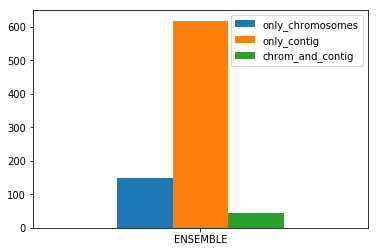

In [3]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

# Create the connection
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

ensembl_chr = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count > 0 AND contig_count == 0", cnx).size
ensembl_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count == 0 AND contig_count >0", cnx).size
chrom_and_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count > 0 AND contig_count > 0", cnx).size


ensemble_dict = {"only_chromosomes": ensembl_chr, "only_contig": ensembl_contig, "chrom_and_contig": chrom_and_contig}
index = {"ENSEMBLE"}
df = pd.DataFrame(ensemble_dict, index=index)
ax = df.plot.bar(rot=0)

# with open('ensemble_dict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in ensemble_dict.items():
#        writer.writerow([key, value])
# df = pd.read_csv('ensemble_dict.csv')

print("ensemble species with only chromosomes:", ensembl_chr)
print("ensemble species with only contigs:", ensembl_contig )
print("species that contain both chromosomes and contigs:", chrom_and_contig)



# NCBI

NCBI species with only chromosomes: 65
NCBI species with only contigs: 193
NCBI that contain both chromosomes and contigs: 10


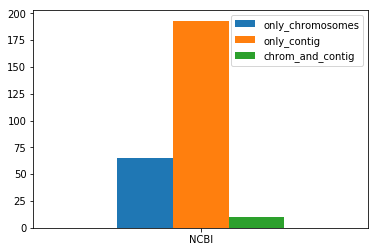

In [4]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

ncbi_chr = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count == 0", cnx).size
ncbi_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count == 0 AND contig_count >0", cnx).size
chrom_and_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count > 0", cnx).size


ncbi_dict = {"only_chromosomes": ncbi_chr, "only_contig": ncbi_contig, "chrom_and_contig": chrom_and_contig}
index = {"NCBI"}
df = pd.DataFrame(ncbi_dict, index=index)
ax = df.plot.bar(rot=0)

# with open('ensemble_dict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in ensemble_dict.items():
#        writer.writerow([key, value])
# df = pd.read_csv('ensemble_dict.csv')

print("NCBI species with only chromosomes:", ncbi_chr)
print("NCBI species with only contigs:", ncbi_contig )
print("NCBI that contain both chromosomes and contigs:", chrom_and_contig)

# 1k

1k species with only chromosomes: 15
1k species with only contigs: 978
1k that contain both chromosomes and contigs: 4


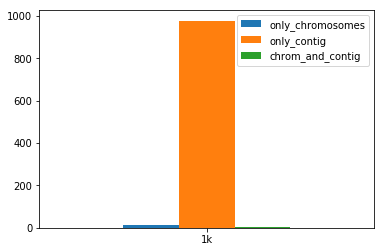

In [5]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

onek_chr = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K' AND chromosome_count > 0 AND contig_count == 0", cnx).size
onek_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K' AND chromosome_count == 0 AND contig_count >0", cnx).size
chrom_and_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K' AND chromosome_count > 0 AND contig_count > 0", cnx).size


onek_dict = {"only_chromosomes": onek_chr, "only_contig": onek_contig, "chrom_and_contig": chrom_and_contig}
index = {"1k"}
df = pd.DataFrame(onek_dict, index=index)
ax = df.plot.bar(rot=0)

# with open('ensemble_dict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in ensemble_dict.items():
#        writer.writerow([key, value])
# df = pd.read_csv('ensemble_dict.csv')

print("1k species with only chromosomes:", onek_chr)
print("1k species with only contigs:", onek_contig )
print("1k that contain both chromosomes and contigs:", chrom_and_contig)

# Combined DNA Type Breakdown (ENSEMBL, 1K, NCBI)

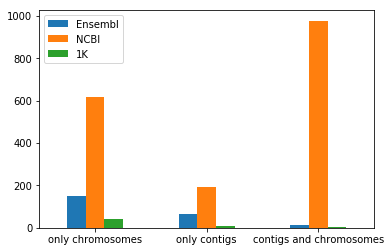

In [6]:
only_chr = [150, 65, 15]
only_contig = [618, 193, 978]
contig_and_chr = [43,10,4]
index = ['only chromosomes', 'only contigs', 'contigs and chromosomes']
df = pd.DataFrame({'Ensembl': only_chr,'NCBI': only_contig, '1K': contig_and_chr}, index=index)
ax = df.plot.bar(rot=0)